# Lectrura de base de datos

## Librerías utilizadas

In [25]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Formato antigüo

### Petición de archivos y almacenamiento de los mismos en dataframe "datos"

In [29]:
# Crear una ventana raíz
root = tk.Tk()
root.withdraw()  # Ocultar la ventana principal

# Abrir el cuadro de diálogo para seleccionar múltiples archivos CSV
file_paths = filedialog.askopenfilenames(
    filetypes=[("CSV files", "*.csv")],
    title="Seleccionar archivos CSV"
)

# Mostrar las rutas de los archivos seleccionados
print("Archivos seleccionados:")
# Cerrar la ventana raíz
root.destroy()
data_frames = []  # Lista para almacenar los DataFrames de cada archivo

for file_path in file_paths:
    print(file_path)
    # Leer solo las primeras 4 columnas y a partir de la cuarta fila del archivo CSV usando pandas
    df = pd.read_csv(file_path, usecols=range(4), skiprows=3)
    # Definir los encabezados de las columnas
    df.columns = ["Fecha", "SalveFacha(PAPLT801_ACH1_CT)", "Sucus(PAPLT813_ACH2_CT)", "Mogotes(PAPLT808_ACH1_CT)"]
    
    data_frames.append(df)  # Agregar el DataFrame a la lista

datos = pd.concat(data_frames, ignore_index=True)

Archivos seleccionados:
C:/Users/juanj/OneDrive/Documentos/FONAG/2014-1018/NIVELES REPRESAS PAPALLACTA 2014.csv
C:/Users/juanj/OneDrive/Documentos/FONAG/2014-1018/NIVELES REPRESAS PAPALLACTA 2015.csv
C:/Users/juanj/OneDrive/Documentos/FONAG/2014-1018/NIVELES REPRESAS PAPALLACTA 2016_cor.csv
C:/Users/juanj/OneDrive/Documentos/FONAG/2014-1018/NIVELES REPRESAS PAPALLACTA 2017.csv
C:/Users/juanj/OneDrive/Documentos/FONAG/2014-1018/NIVELES REPRESAS PAPALLACTA 2018.csv


## Formato nuevo

### Peticioón de archivos y almacenamiento ordenado de los mismoes esn variable "DatosOrdenados"

In [33]:
# Crear una ventana raíz
root = tk.Tk()
root.withdraw()  # Ocultar la ventana principal

# Abrir un cuadro de diálogo para seleccionar un archivo Excel
file_path = filedialog.askopenfilename(
    title="Selecciona un archivo Excel",
    filetypes=(("Archivos de Excel", "*.xlsx *.xls"), ("Todos los archivos", "*.*"))
)

# Mostrar la ruta del archivo seleccionado
print(f"Archivo seleccionado: {file_path}")

# Cerrar la ventana raíz
root.destroy()

# Leer la primera hoja del archivo Excel, omitir las primeras 3 filas y seleccionar las columnas 3 en adelante
df = pd.read_excel(file_path, sheet_name=0, skiprows=3)

df = df.iloc[:,3:]

columns_to_read = [0, 2, 4, 6, 8]
df_list = []

for col in columns_to_read:
    temp_df = df.iloc[:,col]
    df_list.append(temp_df)

# Concatenar los DataFrames
SalveFacha = pd.concat(df_list, ignore_index=True)

df = pd.read_excel(file_path, sheet_name=1, skiprows=3)

df = df.iloc[:,3:]

columns_to_read = [0, 2, 4, 6, 8]
df_list = []

for col in columns_to_read:
    temp_df = df.iloc[:,col]
    df_list.append(temp_df)

# Concatenar los DataFrames
Sucus = pd.concat(df_list, ignore_index=True)

df = pd.read_excel(file_path, sheet_name=1, skiprows=3)

df = df.iloc[:,3:]

columns_to_read = [0, 2, 4, 6, 8]
df_list = []

for col in columns_to_read:
    temp_df = df.iloc[:,col]
    df_list.append(temp_df)

# Concatenar los DataFrames
Mogotes = pd.concat(df_list, ignore_index=True)

fecha_inicio = '2019-01-01'
num_fechas = len(SalveFacha)
fechas = pd.date_range(start=fecha_inicio, periods=num_fechas, freq='D')

# Crear el DataFrame
DatosOrdenados = pd.DataFrame({
    'Fecha': fechas,
    'SalveFacha(PAPLT801_ACH1_CT)': SalveFacha,
    'Sucus(PAPLT813_ACH2_CT)': Sucus,
    'Mogotes(PAPLT808_ACH1_CT)': Mogotes
})

Archivo seleccionado: C:/Users/juanj/OneDrive/Documentos/FONAG/2019-2023/Historicos Niveles Embalses SPI 2019-2023.xlsx


## Unión de información de ambos formatos en variable "Total"

In [35]:
Total = pd.concat([datos, DatosOrdenados], ignore_index=True)
Total['Fecha'] = pd.to_datetime(Total['Fecha'], format='%m/%d/%Y %H:%M')
Total.iloc[:,1:] = Total.iloc[:,1:].apply(pd.to_numeric, errors='coerce')

# Crear df_indicator con valores de 0 donde hay valores nulos
df_indicator = Total.iloc[:, 1:].notnull().astype(int)
df_indicator = df_indicator.replace(0, np.nan)

# Insertar la columna de fechas en la primera posición del DataFrame indicador
df_indicator.insert(0, 'Fecha', Total['Fecha'])

## Gráfica de distribución temporal de datos

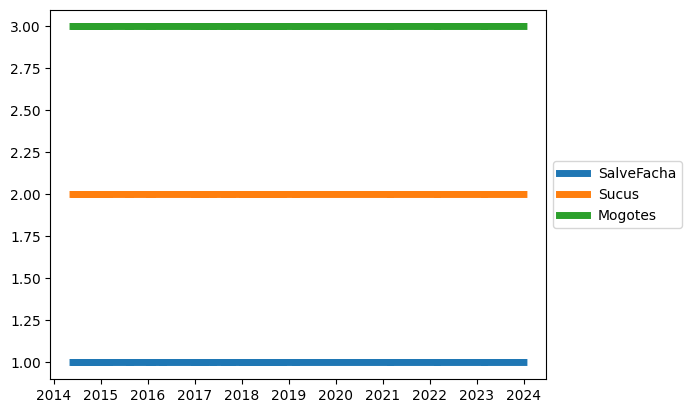

In [37]:
plt.plot(df_indicator.iloc[:, 0], df_indicator.iloc[:, 1], label="SalveFacha", linewidth = 5)
plt.plot(df_indicator.iloc[:, 0], 2*df_indicator.iloc[:, 2], label="Sucus", linewidth = 5)
plt.plot(df_indicator.iloc[:, 0], 3*df_indicator.iloc[:, 3], label="Mogotes", linewidth = 5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

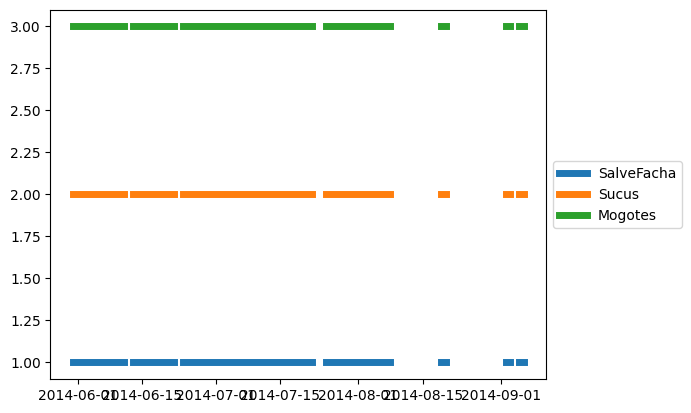

In [39]:
plt.plot(df_indicator.iloc[range(1,100), 0], df_indicator.iloc[range(1,100), 1], label="SalveFacha", linewidth = 5)
plt.plot(df_indicator.iloc[range(1,100), 0], 2*df_indicator.iloc[range(1,100), 2], label="Sucus", linewidth = 5)
plt.plot(df_indicator.iloc[range(1,100), 0], 3*df_indicator.iloc[range(1,100), 3], label="Mogotes", linewidth = 5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
